# Multi-class dog image Classification

using TensorFlow 2.0 and TesorFlow Hub

## Problem
Identifying a breed of a dog given image of a dog

## Data
The data is from Kaggle's dog breed identification competition
[Kaggle]("https://www.kaggle.com/c/dog-breed-identification/overview")

## Evaluation
The evaluation metric for this project is <b>"Multi Class Log Loss"</b>  between the predicted probability and the observed target.

File with probabilities of each breed for each image from test set

## Features

* As an initial data we have images (unstructed data)
* We also have a list of 120 possible breeds of dogs in cluding in our dataset (we have 120 classes fr Classifier)
* Potentially the best approach to solve this task is to use deep learning / transfer learning
* 10222 images in training set (labeled)
* 10357 images in test set (whithout labels)

In [ ]:
# This cell used only once, just to upzip initial data in the Google Drive folder
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dogs_breed/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks/Dogs_breed/"

## Import section

### Tensor Flow
* Import Tensor Flow
* Import Tensor Hub
* Make sure we use GPU

### General modules
* pandas
* numpy
* matplotlib
* seaborn

### Preprocessing data
* train test split

In [1]:
# Import tensor flow
import tensorflow as tf
import tensorflow_hub as hub
print(f"Tensor Flow version: {tf.__version__}")
print(f"Tensor Flow Hub version: {hub.__version__}")

# Check for GPU availability
print("GPU: ", "Yes" if tf.config.list_physical_devices("GPU") else "No")

# Import general modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import module to work with date and time
import datetime as dt

# Import functions for preprocessing data
from sklearn.model_selection import train_test_split

# Import for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Tensor Flow version: 2.14.0
Tensor Flow Hub version: 0.15.0
GPU:  Yes


## Load initial data

In [2]:
# Reading labels related to Train data set
labels_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dogs_breed/labels.csv")
labels_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

* ID - file name with picture of the dog from Train dataset
* breed - breed title, label which we need to predict in our model

In [ ]:
labels_df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

As we can see, we have <b>10222</b> files (exact number of files in Train folder) and <b>120</b> different breed labels

Now we will visualize how different breeds are presented in our dataset

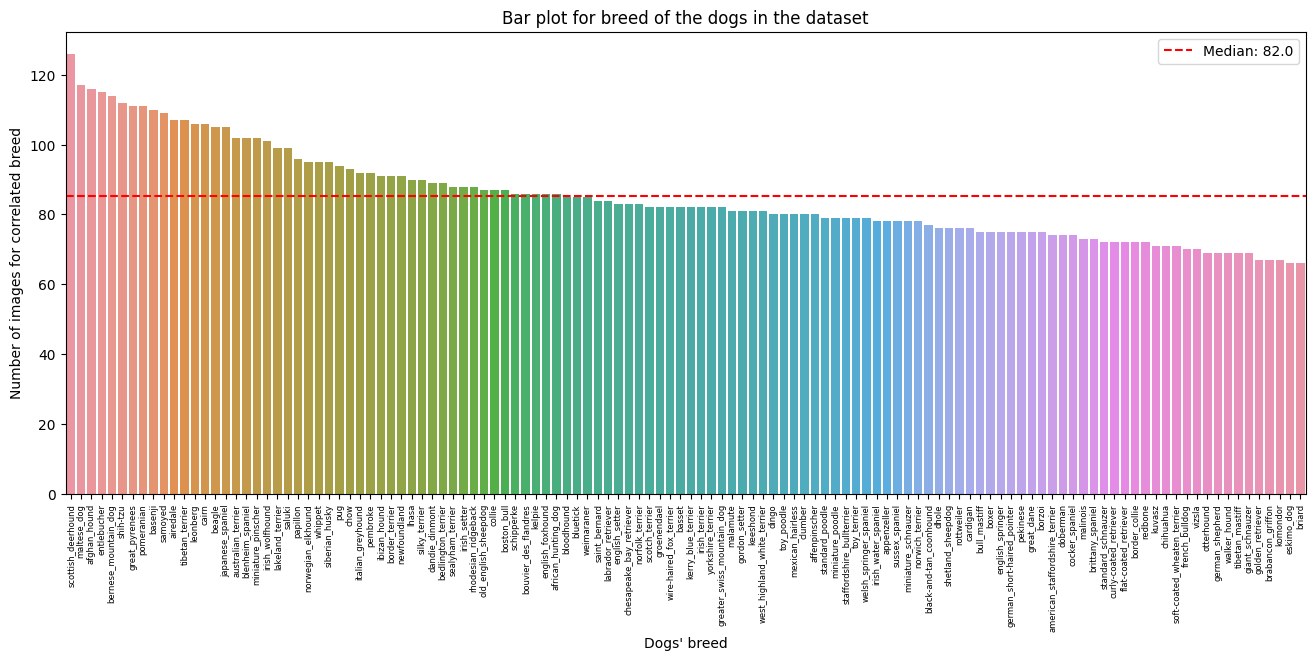

In [ ]:
# Create barplot to check how different "breeds" presented in our dataset
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=labels_df["breed"].value_counts().reset_index(),
            x="index",
            y="breed");
plt.xticks(rotation=90, fontsize=6);
ax.axhline(labels_df["breed"].value_counts().mean(),
           ls="--",
           color="red",
           label=f"Median: {labels_df.breed.value_counts().median()}")
plt.legend();
ax.set(title="Bar plot for breed of the dogs in the dataset",
       xlabel="Dogs' breed",
       ylabel="Number of images for correlated breed");

Top5 breeds presented in the dataset are:
* scottish_deerhound;
* maltese_dog:
* afghan_hound;
* entlebucher;
* bernese_mountain_dog.

Maximum number of pictures: <b>126</b> (scottish_deerhound)

Minimum number of pictures <b>66</b> (eskimo_dog and briard)

Median number of samples: <b>82</b>

[<font color='red'> *Ideal to have <b>100</b> images per class, minimum number of images: <b>10</b> images per class*</font> ]

## Initial preprocessing data

Specify the path to the images and create the list with absolute path for that images

In [3]:
# Create a path for all images from train dataset:
path_names = list("/content/drive/MyDrive/Colab Notebooks/Dogs_breed/train/" + labels_df["id"] + ".jpg")

Verification that our list of image

The number of pictures in the train set: 10222


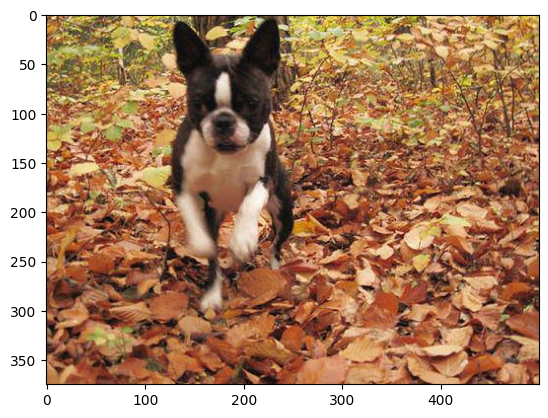

In [ ]:
# in order to verify our path_names variable, load and show the first image from it
with open(path_names[0], "rb") as to_read:
  img = plt.imread(to_read)

plt.imshow(img);
print(f"The number of pictures in the train set: {len(path_names)}")

This is confirm that we have 10222 images and 1022 labels related to that images

In [4]:
# Create list of all unique breeds (120):
unique_labels = labels_df["breed"].unique()

# Sort the labels in alphabetic order
unique_labels.sort()

# Convert all breeds labels in our dataframe 'label_df' into boolean array
labels_boolean = [labels_df["breed"][i] == unique_labels for i in labels_df["breed"].index]

# Verification
print(f"label_boolean length: {len(labels_boolean):>37}")
print(f"Label from initial labels dataset: {labels_df['breed'][1000]:>24}")
print(f"Corresponded label defined from boolean array: {unique_labels[labels_boolean[1000].argmax()]}")
print()
labels_boolean[1000].astype(int)

label_boolean length:                                 10222
Label from initial labels dataset:             irish_setter
Corresponded label defined from boolean array: irish_setter



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

So we have boolean array `labels_boolean` for each image with just one True in it, corresponded to the actual breed that image related to

In [ ]:
# len(labels_boolean)
len(path_names)

10222

## Set Training and Validation sets

### Define x & y variables

In [5]:
# Define X and y variables
X = path_names
y = labels_boolean

### Set Number of images for experimenting (`NUM_IMAGES`)

As we have 10222 images it will take a lot of time for experimenting with all that images at once.

Just for experiment phase checking what will work and what will not, the most appropriate approach is:

<font color='red'>To create subsample starting from <b>1000</b> images and <b>increasing</b> this number if required</font>

This approach will minimize time for finding the best model and its parameters during experiment phase

In [6]:
#  Set the number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


### Split the data for Training and Validation sets

NOTE: We try to keep classes balance in the sample the same as it is in the main (full) dataset

In [7]:
# We try to keep class balance in our sample from the full dataset, in order to make better prediction

# Create a sample with current NUM_IMAGES length and the same classes balance as in the main data set
X_sample, _, y_sample, _ = train_test_split(X,
                                            y,
                                            train_size=NUM_IMAGES / len(X),
                                            stratify=y,
                                            random_state=42)

# Verification that everything is as expected:
print(f"Current NUM_IMAGES: {NUM_IMAGES}")
print(f"Samles length for X_sample: {len(X_sample)}")
print(f"Samles length for y_sample: {len(y_sample)}")

# Split the sample into the Training and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_sample,
                                                  y_sample,
                                                  test_size=0.2,
                                                  stratify=y_sample,
                                                  random_state=42)

# Verification Train and Validation test size:
print()
print(f"X_train size: {len(X_train)}")
print(f"y_train size: {len(y_train)}")
print(f"X_val size: {len(X_val)}")
print(f"y_val size: {len(y_val)}")


Current NUM_IMAGES: 1000
Samles length for X_sample: 1000
Samles length for y_sample: 1000

X_train size: 800
y_train size: 800
X_val size: 200
y_val size: 200


## Preprocessing data

### Сonverting images into Tensors

We will create a function for image processing:
* The function get impage path as an input
* Step 1: load the image with TensorFlow and save it as `image` variable
* Step 2: Transform `image` variable from <b>jpg</b> into <b>Tensors</b>
* Step 4: Normalize images' colour channels (from <b>0-255</b> to <b>0-1</b>)
* Step 3: Resize the image just that all images will be the same standard size <b>(224,224)[IMG_SIZE]</b>
* Step 4: Return modified `image`

In [8]:
# Define IMG_SIZE variable
IMG_SIZE = 224

def image_processing(path:str, size:int=IMG_SIZE):
  """
  This function load the image from specified path, convert it into Tensors
  and resize it

  required import:
  import tensorflow as tf
  import matplotlib.pyplot as plt
  predefined IMG_SIZE variable

  parameters:
  path - path to the image, string
  size - image size for resizing, integer, Default=IMG_SIZE

  return: image - modified image
  """
  # Load image:
  image = tf.io.read_file(path)

  # Convert image into Tensors with three colour channels (Red, Green, Blue):
  # image_tensors = tf.constant(image)
  image = tf.image.decode_jpeg(image, channels=3)

  # Conver colour channels from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)

  # Resizing image:
  image = tf.image.resize(image, size=[size, size])

  # Return the result:
  return image

In [ ]:
# Verification that function "image_processing" works correctly:
# uncomment the next line for verification check
# image_processing(X_train[2])

### Turning data into the batches

Ar first we will create a function which return our data in form of the tuple (image, label) in Tesnsors

In [9]:
def get_image_label(path:str, label:np.ndarray, size:int=IMG_SIZE) -> tuple:
  """
  This function get image_path (path) and label (label)
  and return tuple (path, label)

  required:
  import tensorflow as tf
  import matplotlib.pyplot as plt
  predefined IMG_SIZE variable

  parameters:
  path - path to the image, string
  label - np.ndarray with label infoimage size for resizing (IMG_SIZE), integer
  size - image size for resizing, integer, Default=IMG_SIZE

  return: (image, label), tuple
  """

  # return preprocessed image and its label in form of Tensors
  return image_processing(path, size) , label

In [ ]:
# Verification of function "get_image_label" works correctly
# uncomment the next line for verification check
# get_image_label(X_train[10], y[10])

Batch size is a number of images which will be processing at the dame time.

The most optimal value for this variable <b>32</b> according current global point of view

Create a function to turn data into batches

In [10]:
# Define batch size (32 is recommended value)
BATCH_SIZE = 32

# Create a function to divide data into the batches
def create_data_batches(X:list,
                        y=None,
                        batch_size:int=BATCH_SIZE,
                        valid_data:bool=False,
                        test_data:bool=False):

  """
  This function take X (image) and y (label) and divide data into batches
  with specified size
  Shuffles the data if it is training data
  (skip this step if Validataion or Test sets)
  Accept Test data (without labels) as an input

  required:
  predefined BATCH_SIZE variable if not provided

  parameters:
  X -independen variable - images
  y - dependent variable - label (breed) (if aplicable)
      For test set y variable will not be provided and set to None
  batch_size - size of the batches, Default=BATCH_SIZE (initially 32)
  valid_data - define if the input is Validation set, Default=False
  test_data - define if the input is Test set, Default=False

  return data in batches
  """
  # This code will be executed only if we have test data as an input
  if test_data:
    # Make sure we understand which proccess we have at the moment
    # and the dataset type we processing
    print("Creating test data batches...")

    # transform dataset into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))

    # Load and prepocess images, packing them into batches
    data_batch = data.map(image_processing).batch(BATCH_SIZE)


  # This code will be executed only if we have validation data as an input
  elif valid_data:
    # Make sure we understand which proccess we have at the moment
    # and the dataset type we processing
    print("Creating validation data batches...")

    # transform dataset into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    # Load and prepocess images, packing them into batches
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  # This code will be executed only if we have train data as an input
  else:
    # Make sure we understand which proccess we have at the moment
    # and the dataset type we processing
    print("Creating train data batches...")

    # transform dataset into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    # Shuffle the data
    data = data.shuffle(buffer_size=len(X))

    # Load and prepocess images, packing them into batches
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  return data_batch

In [11]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches...
Creating validation data batches...


In [ ]:
# Check attributes for created batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

<b>NOTES</b>:  
Initially we have <b>800</b> images for <b>Train</b> dataset  
So with `batch_size=32` we have `800 / 32 = 25` batches
And we can iterate `train_data` each time getting one batch from the whole set, which make it easier to process and save our resourses

In [ ]:
# Varification number of batches for Train set
print(f"Number of batches expected: {np.ceil(len(X_train) / BATCH_SIZE)}")
print(f"Number of batches actual: {len(list(train_data.as_numpy_iterator()))}")

Number of batches expected: 25.0
Number of batches actual: 25


### Visualizing batches

Creating a function to plot images from batches

In [12]:
def batch_plot(images, labels) -> None:
  """
  This function plots 32 images with label containing in one batch

  parameters:
  images - images to plot
  labels - corresponded labels for each image

  return None
  """

  fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(12,16))
  current = 0
  for current_ax in ax.reshape(-1):
    if current >= len(images):
      current_ax.axis("off")
    else:
      current_ax.imshow(images[current])
      current_ax.set(title=unique_labels[labels[current].argmax()]);
      current_ax.axis("off")
      current += 1

  return

In [ ]:
# Visualize the batch from training set
train_images, train_labels = next(train_data.as_numpy_iterator())
batch_plot(train_images, train_labels)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualize validation batch
val_images, val_label = next(valid_data.as_numpy_iterator())
batch_plot(val_images, val_label)

Output hidden; open in https://colab.research.google.com to view.

## Model Creation

### Setting INPUT_SHAPE, OUTPUT_SHAPE and MODEL_URL

* Define input shape to our model (X data in Tensors form)
* Define output shape from our model
* Define URL of the model we will use (Tensor Flow Hub)

In [13]:
# Define input shape to our model (X data in Tensors form)
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Define output shape from our model (array with length of unique labels)
OUTPUT_SHAPE = len(unique_labels)

# Define URL of the model we will use (Tensor Flow Hub)
# We need image multiclass classificator
# model originally to try - first submittion attemt
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

# Second attemt Alternative model to try:
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


### Creating Model

Define function which:
* Get INPUT_SHAPE, OUTPUT_SHAPE and MODEL_URL as initial parameters;
* Define the layers in secuential fashion
* Compile the model
* Build the model
* Return the model

In [14]:
def create_model(input_shape:list=INPUT_SHAPE, output_shape:int=OUTPUT_SHAPE, model_url:str=MODEL_URL):
  """"
  This function get input_shape, output_shape and model_url
  and return Keras sequential model

  required:
  if not provided, requred the following variables to be predifined:
  - INPUT_SHAPE;
  - OUTPUT_SHAPE;
  - MODEL_URL.

  parameters:
  input_shape - the shape of the expected input to the model, Default=INPUT_SHAPE,
  output_shape - the shape of the expected output from the model, Default=OUTPUT_SHAPE,
  model_url - link to the prebuild model used for new model creation, Default=MODEL_URL

  return: Keras model
  """

  print(f"Building model with: {model_url}")

  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape,
                          activation="softmax")]) # Layer 2 (output layer)

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=["accuracy"])

  # Build the model
  model.build(input_shape)

  return model


In [15]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating Callbacks

* Load TensorBoard notebook extention
* We will create a function to help us to track model learning progress (TensorBoard)
* EarlyStopping callback to help us to prevent model from overfitting

**Load TensorBoard notebook extention**

In [ ]:
# Load TensorBoard notebook extention
%load_ext tensorboard

**TensorBoard Callback**

In [16]:
def custom_tensorboard_callback(path:str=r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/logs"):
  """
  This function will create log in the log directory, specified for this project
  Log name will include the date and time when function is called

  required:
  import os
  import datetime as dt

  parameters:
  path - absolute path to the directory where to save logs
         Default=r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/logs"

  return: logs event for TensorBoard in log directory
  """
  # Create a log directory for storing TensorBoards logs
  log_dir = os.path.join(path,
                        dt.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(log_dir)

**Early Stopping Callback**

In [17]:
# Create Early Stopping Callback in order to prevent model overfitting by
# stopping training when a monitored quantaty stopped improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training the Model

### Training the model on the subset

We will train our model just on the 1000 images just to make sure that everything is working. We do not use all the available data for this purporse as it will be more time consuming

In [18]:
# This variable is setting how many times our model will
# go through the images in order to find pattern
NUM_EPOCHS = 100 #@param {type : "slider", min : 10, max : 100, step : 10}


In order to make things easier when we change parameters and will traing model on different amount of data we will create a function, which will:
* create a model
* setup TensorBoard Callback
* fit() the model based on current parameters
* return the trained model

In [19]:
def train_model(train_data=train_data,
                valid_data=valid_data,
                early_stopping=early_stopping,
                num_epochs:int=NUM_EPOCHS,
                input_shape:list=INPUT_SHAPE,
                output_shape:int=OUTPUT_SHAPE,
                model_url:str=MODEL_URL):
  """
  This function trains a given model and returns a trained model

  required:
  import os
  import datetime as dt
  if not provided, requred the following variables to be predifined:
  - train_data;
  - valid_data;
  - early_stopping
  - NUM_EPOCHS;
  - INPUT_SHAPE;
  - OUTPUT_SHAPE;
  - MODEL_URL.

  parameters: All parameters are optional
  train_data - Train dataset in batches
  valid_data - Validation dataset in batches
  num_epochs - Number of epoch
  early_stopping - Early Stopping Callback
  input_shape - the shape of the expected input to the model, Default=INPUT_SHAPE,
  output_shape - the shape of the expected output from the model, Default=OUTPUT_SHAPE,
  model_url - link to the prebuild model used for new model creation, Default=MODEL_URL

  return: Traned model
  """
  # Create a model
  model = create_model()

  #  Create new TensorBoard session every time we train the model
  tensorboard = custom_tensorboard_callback()

  # Train the model on Training and Validation data
  model.fit(x=train_data,
            epochs=num_epochs,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  # Return the trained model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Epoch 1/100
25/25 [==============================] - 142s 5s/step - loss: 4.6007 - accuracy: 0.0988 - val_loss: 3.0754 - val_accuracy: 0.3400
Epoch 2/100
25/25 [==============================] - 50s 2s/step - loss: 1.7002 - accuracy: 0.6988 - val_loss: 1.7802 - val_accuracy: 0.6350
Epoch 3/100
25/25 [==============================] - 61s 2s/step - loss: 0.5882 - accuracy: 0.9413 - val_loss: 1.3291 - val_accuracy: 0.7550
Epoch 4/100
25/25 [==============================] - 61s 2s/step - loss: 0.2621 - accuracy: 0.9912 - val_loss: 1.1704 - val_accuracy: 0.7500
Epoch 5/100
25/25 [==============================] - 50s 2s/step - loss: 0.1480 - accuracy: 1.0000 - val_loss: 1.0857 - val_accuracy: 0.7500
Epoch 6/100
25/25 [==============================] - 60s 2s/step - loss: 0.0998 - accuracy: 1.0000 - val_loss: 1.0433 - val_accuracy: 0.7600
Epoch 7/100
25/25 [==============================] - 52s 2s/

### Checking the TensorFlow logs / Model performance with mpl

In [ ]:
# This is not executed at the moment
# %tensorboard --logdir /content/drive/MyDrive/Colab\ Notebooks/Dogs_breed/logs

After we built and fit the mode, we can check model performance

In [20]:
def performance_plot(model):
  """
  This function plot model training performance
  for Loss and Acuracy for each training step

  parameters:
  model - training model
  """
  # Create sublots
  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

  # Loss plot
  ax1.plot(model.history.history["loss"], label="Training")
  ax1.plot(model.history.history["val_loss"], label="Validation")
  ax1.legend()

  # Accuracy plot
  ax2.plot(model.history.history["accuracy"], label="Training")
  ax2.plot(model.history.history["val_accuracy"], label="Validation")
  ax2.legend()

  # Additional plot settings
  fig.suptitle("Model performance")
  ax1.set(xlabel="Training Steps",
          ylabel="Loss")
  ax2.set(xlabel="Training Steps",
          ylabel="Accuracy");

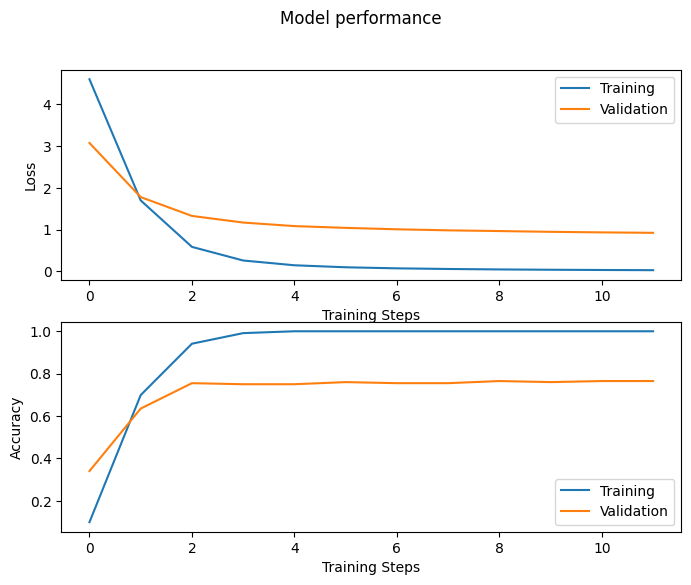

In [ ]:
performance_plot(model)

##Making predictions

Using model make predictions and evaluate the model performance

In [ ]:
# Make predictions on the Validation dataset
predictions = model.predict(valid_data, verbose=1)

7/7 [==============================] - 24s 3s/step


In [ ]:
predictions

array([[3.5958437e-05, 2.1812539e-05, 4.3064719e-03, ..., 6.5401089e-03,
        8.7132194e-06, 3.1662956e-04],
       [1.4909205e-05, 1.2522434e-04, 1.7493403e-04, ..., 2.0416293e-04,
        5.5620912e-03, 6.8125060e-05],
       [2.3448789e-03, 5.8900230e-05, 9.0883294e-04, ..., 1.6919993e-03,
        6.5805725e-05, 9.0090511e-03],
       ...,
       [2.3590113e-05, 1.9152509e-05, 1.6256288e-05, ..., 5.1330338e-05,
        9.4970739e-05, 2.4946772e-05],
       [3.6816989e-04, 5.7423365e-04, 2.7927242e-03, ..., 1.1192123e-02,
        3.9363564e-03, 1.0563681e-04],
       [2.7370860e-04, 3.0526771e-05, 7.2044902e-05, ..., 2.2473316e-05,
        3.1732849e-04, 8.6724154e-05]], dtype=float32)

[8.5985597e-04 2.8202613e-04 6.3184561e-05 2.4531031e-04 4.3394242e-04
 4.7262930e-04 1.6572024e-03 1.6048818e-04 2.9540898e-03 1.8665623e-03
 3.2639253e-04 1.1911688e-05 1.5241063e-05 1.2433384e-02 3.3031224e-04
 6.9547903e-05 5.6319841e-05 3.4711699e-04 7.8356331e-03 3.9100824e-03
 4.7914595e-03 1.0743445e-04 7.7239908e-03 4.0247655e-04 2.8861052e-04
 5.7246920e-04 5.4403034e-05 6.2890496e-04 1.5917883e-04 3.1585051e-03
 2.7994696e-05 5.8081645e-01 1.9034306e-02 2.2342894e-05 1.6234080e-04
 6.7118846e-04 4.7509580e-05 4.8563638e-04 7.1772256e-06 2.9719498e-03
 1.7910836e-02 8.9048536e-04 2.0983161e-03 6.0834101e-04 1.7801520e-05
 1.6935548e-03 1.0616320e-05 6.0013881e-05 3.2066800e-05 3.1243224e-04
 5.6764864e-05 4.3979220e-04 2.8119131e-04 3.6806354e-04 3.5918485e-05
 9.5932145e-04 1.3623334e-03 3.1095563e-04 1.8547542e-03 2.9265170e-04
 2.0909089e-05 1.7478407e-04 7.4944779e-05 7.8323785e-05 2.4152485e-05
 1.6780606e-03 1.3830329e-04 4.0981722e-05 6.4959360e-04 7.2643401e-05
 3.661

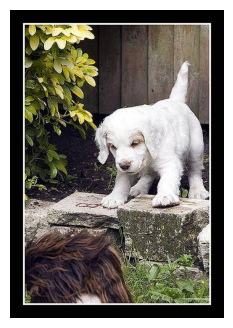

In [ ]:
# Set index we want to check in the predictons
index = 1

# Open corresponded image from validation dataset
# as we made prediction based on that set
with open(X_val[index], "rb") as to_read:
  img = plt.imread(to_read)

# plot corresponded image
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img)
ax.axis("off");

# plot supported data with labels in plain text
print(predictions[index])
print("\nPrediction Probabilities (confidence level): ", predictions[index].max())
print(f"Predicted label: {unique_labels[predictions[index].argmax()]}")
print(f"True label: {unique_labels[y_val[index].argmax()]}")


## Model Evaluation

Lets create function which convert prediction probabilities into respective label, which is easier to understand

In [21]:
def get_predicted_label(predictions_prob:np.ndarray, unique_labels:np.ndarray=unique_labels) ->str:
  """
  This function takes probabilities array and return predicted labels in the list

  required:
  import numpy as np
  predefined unique_labels - if not provided

  parameters:
  predictions_prob - array of predicted probabilities
  unique_labels - list of unique labels

  return:
  a predicted label
  """
  return unique_labels[predictions_prob.argmax()]

In [ ]:
# Check the function:
get_predicted_label(predictions[1])

'clumber'

In [ ]:
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

As our data in the batches, we need to create function which unbachify in order to make it easier to compare predicted laels with True labels and to display the corresponded image the prediction was made from

In [22]:
def unbatch_data(batched_data):
  """
  This function will get batched data, unpacked it
  and return list of preprocessed images and list of True labels

  parameters:
  batched_data - batched data with images and labels in it

  retrun:
  images_from_batch - list of preprocessed images
  labels_from_batch - list of True labels of the images
  """
  # Initial setup
  images_from_batch = []
  labels_from_batch = []

  # Unbatched data and iterate through all batches,
  # adding images and labels to corresponded lists
  for image, label in valid_data.unbatch().as_numpy_iterator():
    images_from_batch.append(image)
    labels_from_batch.append(label)

  return images_from_batch, labels_from_batch

In [ ]:
# Verification of unbatch_data function:
images_from_batch, labels_from_batch = unbatch_data(valid_data)

index = 1
print(f"Predicted label: {get_predicted_label(predictions[index])}")
print(f"True label: {get_predicted_label(labels_from_batch[index])}")

Predicted label: clumber
True label: clumber


### Visualization of predictions

We have:
* predicted labels (**predictions** with **get_predicted_label** function)
* validation images (**images_from_batch**)
* true labels (**labels_from_batch** with **get_predicted_label** function)

We need to make this data more visual

In [23]:
def visual_prediction(images:np.ndarray, predictions:np.ndarray, labels:np.ndarray=None, index:int=0):
  """
  This function take arrays of images, true labels, predictions
  and index of image prediction of which we whant to visualize
  As a result the function plot the required image where the title is
  consist of True label and Predicted label
  In case the right prediction the colour of the title will be green
  and it will be red in case of incorrect predictions

  requirements:
  get_predicted_label  - predifined function

  parameters:
  images - numpy nd.array of images
  predictions - numpy nd.array of label predictions
  labels - numpy nd.array of true labels, optional, Default=None
  index - integer, the index of the image we would like to visualize, Default=0

  return: None
  """
  # Show the required image
  plt.imshow(images[index])
  # Turn off the axis
  plt.axis("off");

  # Define predicted labels
  predicted_label = get_predicted_label(predictions[index])

  # Define confidence level
  confidence = np.max(predictions[index]) * 100

  # Check if we have True labels or not:
  if labels != None:
    # Define True labels
    actual_label = get_predicted_label(labels[index])

    # Set the colour according correct or incorrect prediction
    if predicted_label == actual_label:
      colour = "green"
    else:
      colour = "red"
    # Set the title
    plt.title(f"{predicted_label} with confidence: {confidence:.2f}%\nTrue label: {actual_label}", color=colour);

  else:
    # Set the title
    plt.title(f"{predicted_label} with confidence: {confidence:.2f}%", color="black");


  return

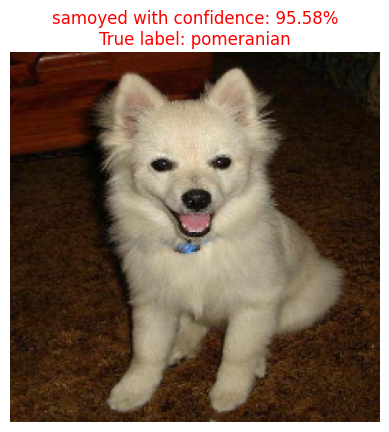

In [ ]:
index = 5
visual_prediction(images=images_from_batch,
                  predictions=predictions,
                  labels=labels_from_batch,
                  index=index)

### Visualizing TOP10 predictions

Now we create the function that display TOP10 of our predictions and highlighted the true value in green

In [24]:
def top10_predictions(predictions:np.ndarray, labels:np.ndarray=None, index:int=0):
  """
  This function take true labels, predictions and index of image,
  TOP 10 prediction of which we whant to visualize
  As a result the function plot TOP 10 predictions with tru label
  in greeny colour ("#62e7a7") and the rest of the labels in grey ("#b0bcc1")

  requirements:
  get_predicted_label  - predifined function

  parameters:
  predictions - numpy nd.array of label predictions
  labels - numpy nd.array of true labels, Default=None
  index - integer, the index of the image we would like to check predictions for
          Default=0

  return: None
  """

  # Define TOP 10 indexes for required image
  top10_predictions_ind = np.argsort(predictions[index])[::-1][:10]

  # Define confidence level for that TOP 10 predictions
  top10_predictions = predictions[index][top10_predictions_ind]

  # Define labels corresponded to TOP 10 predictions
  top10_predicted_labels = unique_labels[top10_predictions_ind]

  # Define actual label corresponded to TOP 10 predictions
  if labels != None:
    actual_label = get_predicted_label(labels[index])

    # Define the colour scheme
    colour = ["#62e7a7" if label == actual_label else "#b0bcc1" for label in top10_predicted_labels]
  else:
    colour = "black"

  # Create the bar plot
  plt.bar(x=top10_predicted_labels,
          height=top10_predictions,
          color=colour);

  # Rotate the x ticks
  plt.xticks(rotation=90);

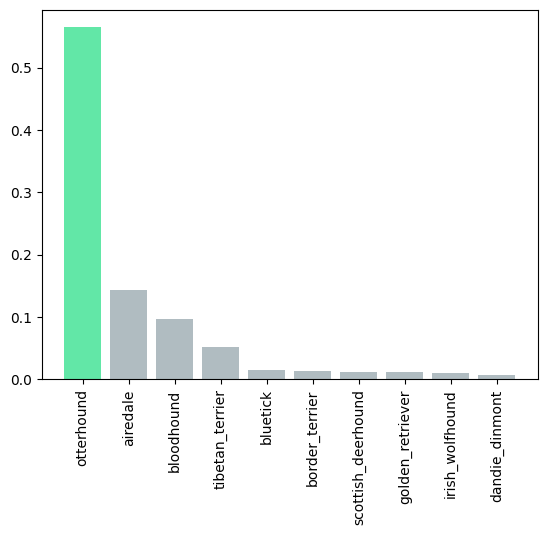

In [ ]:
top10_predictions(predictions=predictions,
                  labels=labels_from_batch,
                  index=8)

### Visualizing Number of Images and TOP10 predictions together

Now we can combine this two functions together and create function which will plot required number of images with top10 predicted labels

In [25]:
def plot_pred_images(images:np.ndarray,
                     predictions:np.ndarray,
                     labels:np.ndarray=None,
                     num_images:int=1,
                     start:int=0):
  """
  This function plots required number of images
  with corresponded TOP 10 predicted labels

  parameters:
  images - numpy nd.array of images
  predictions - numpy nd.array of label predictions
  labels - numpy nd.array of true labels, Default=None
  num_images - number of images required to plot, int
               (cannot be greater than number of provided images,
                starting from Start position)
                Default=1
  start - index from which we should start to plot images, int
          Default=0

  return: None
  """
  # Check the number of images to plot
  if len(images[start:]) < num_images:
    print("Number of images to plot is more than we have in the dataset")
    num_images = len(images[start:])

  # Define how many columns and rows we are required for this plot:
  # Set number of columns
  num_cols = 2

  # Define number of rows
  num_rows = int(np.ceil(num_images / 2))

  # Set plot size depending of number of images we want to plot
  plt.figure(figsize=(num_cols * 6, num_rows * 5))

  for i in range(num_images):
    # Plot the image
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    visual_prediction(images=images,
                      labels=labels,
                      predictions=predictions,
                      index=start + i)
    # Plot TOP10 predicted labels
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    top10_predictions(labels=labels_from_batch,
                      predictions=predictions,
                      index=start + i)
    plt.tight_layout(h_pad=1.0);

  return

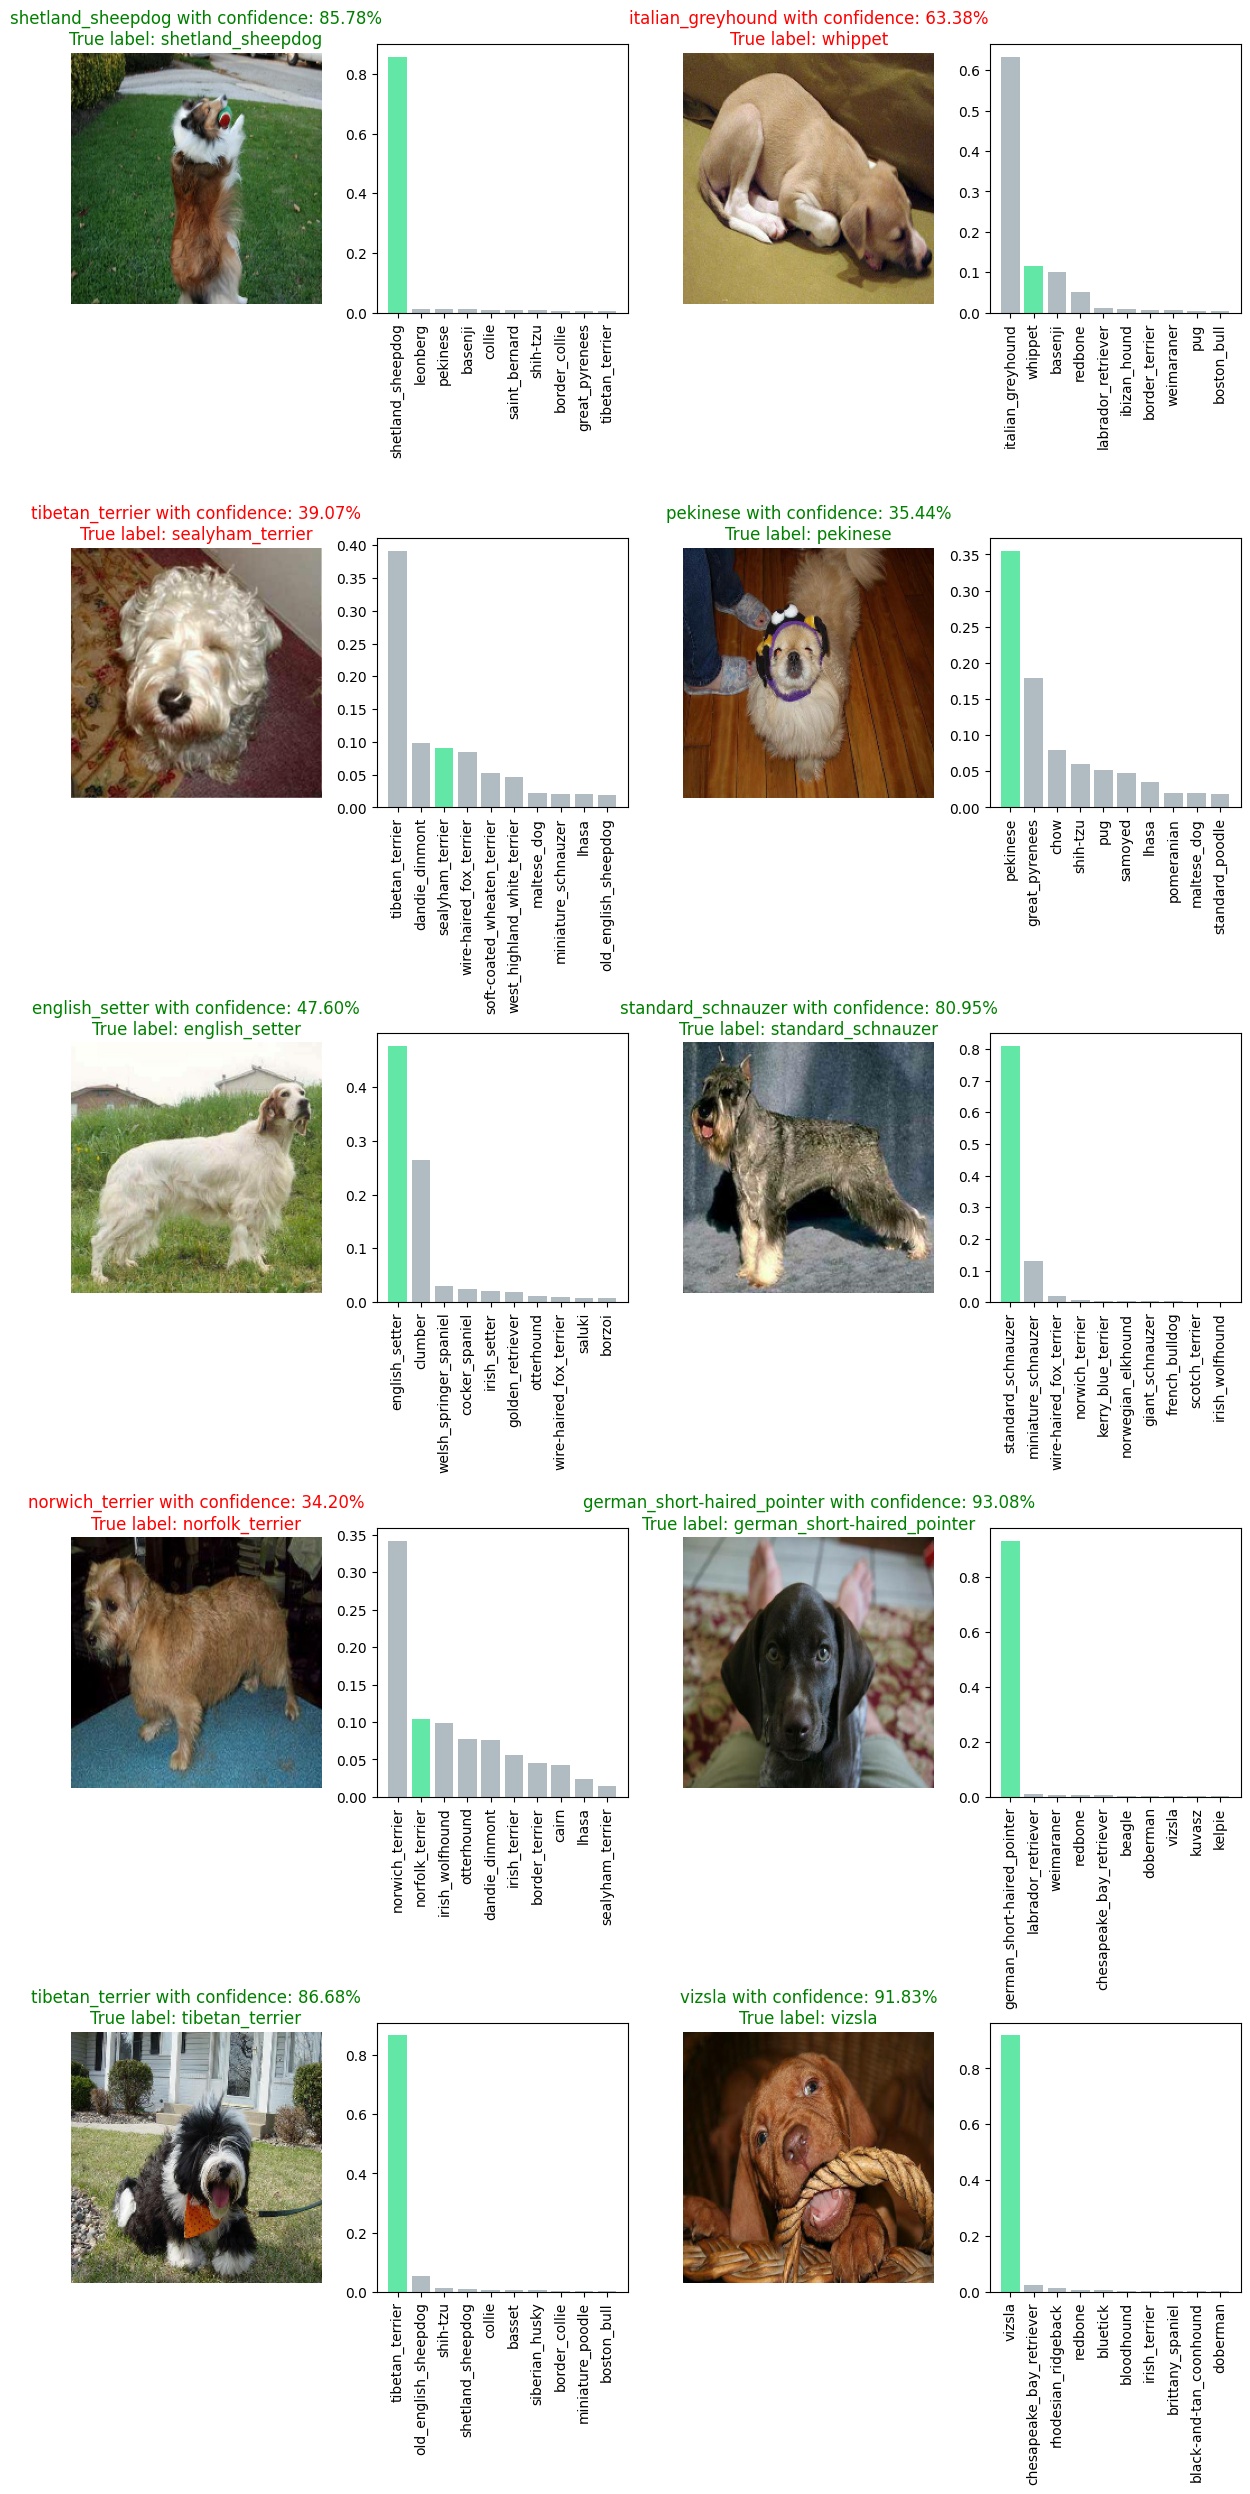

In [ ]:
# Set number of images to plot:
images_to_plot = 10
start_position = 9

plot_pred_images(images=images_from_batch,
                 labels=labels_from_batch,
                 predictions=predictions,
                 num_images=images_to_plot,
                 start=start_position)

### Confusion matrix

Let's create confucion matrix for our model

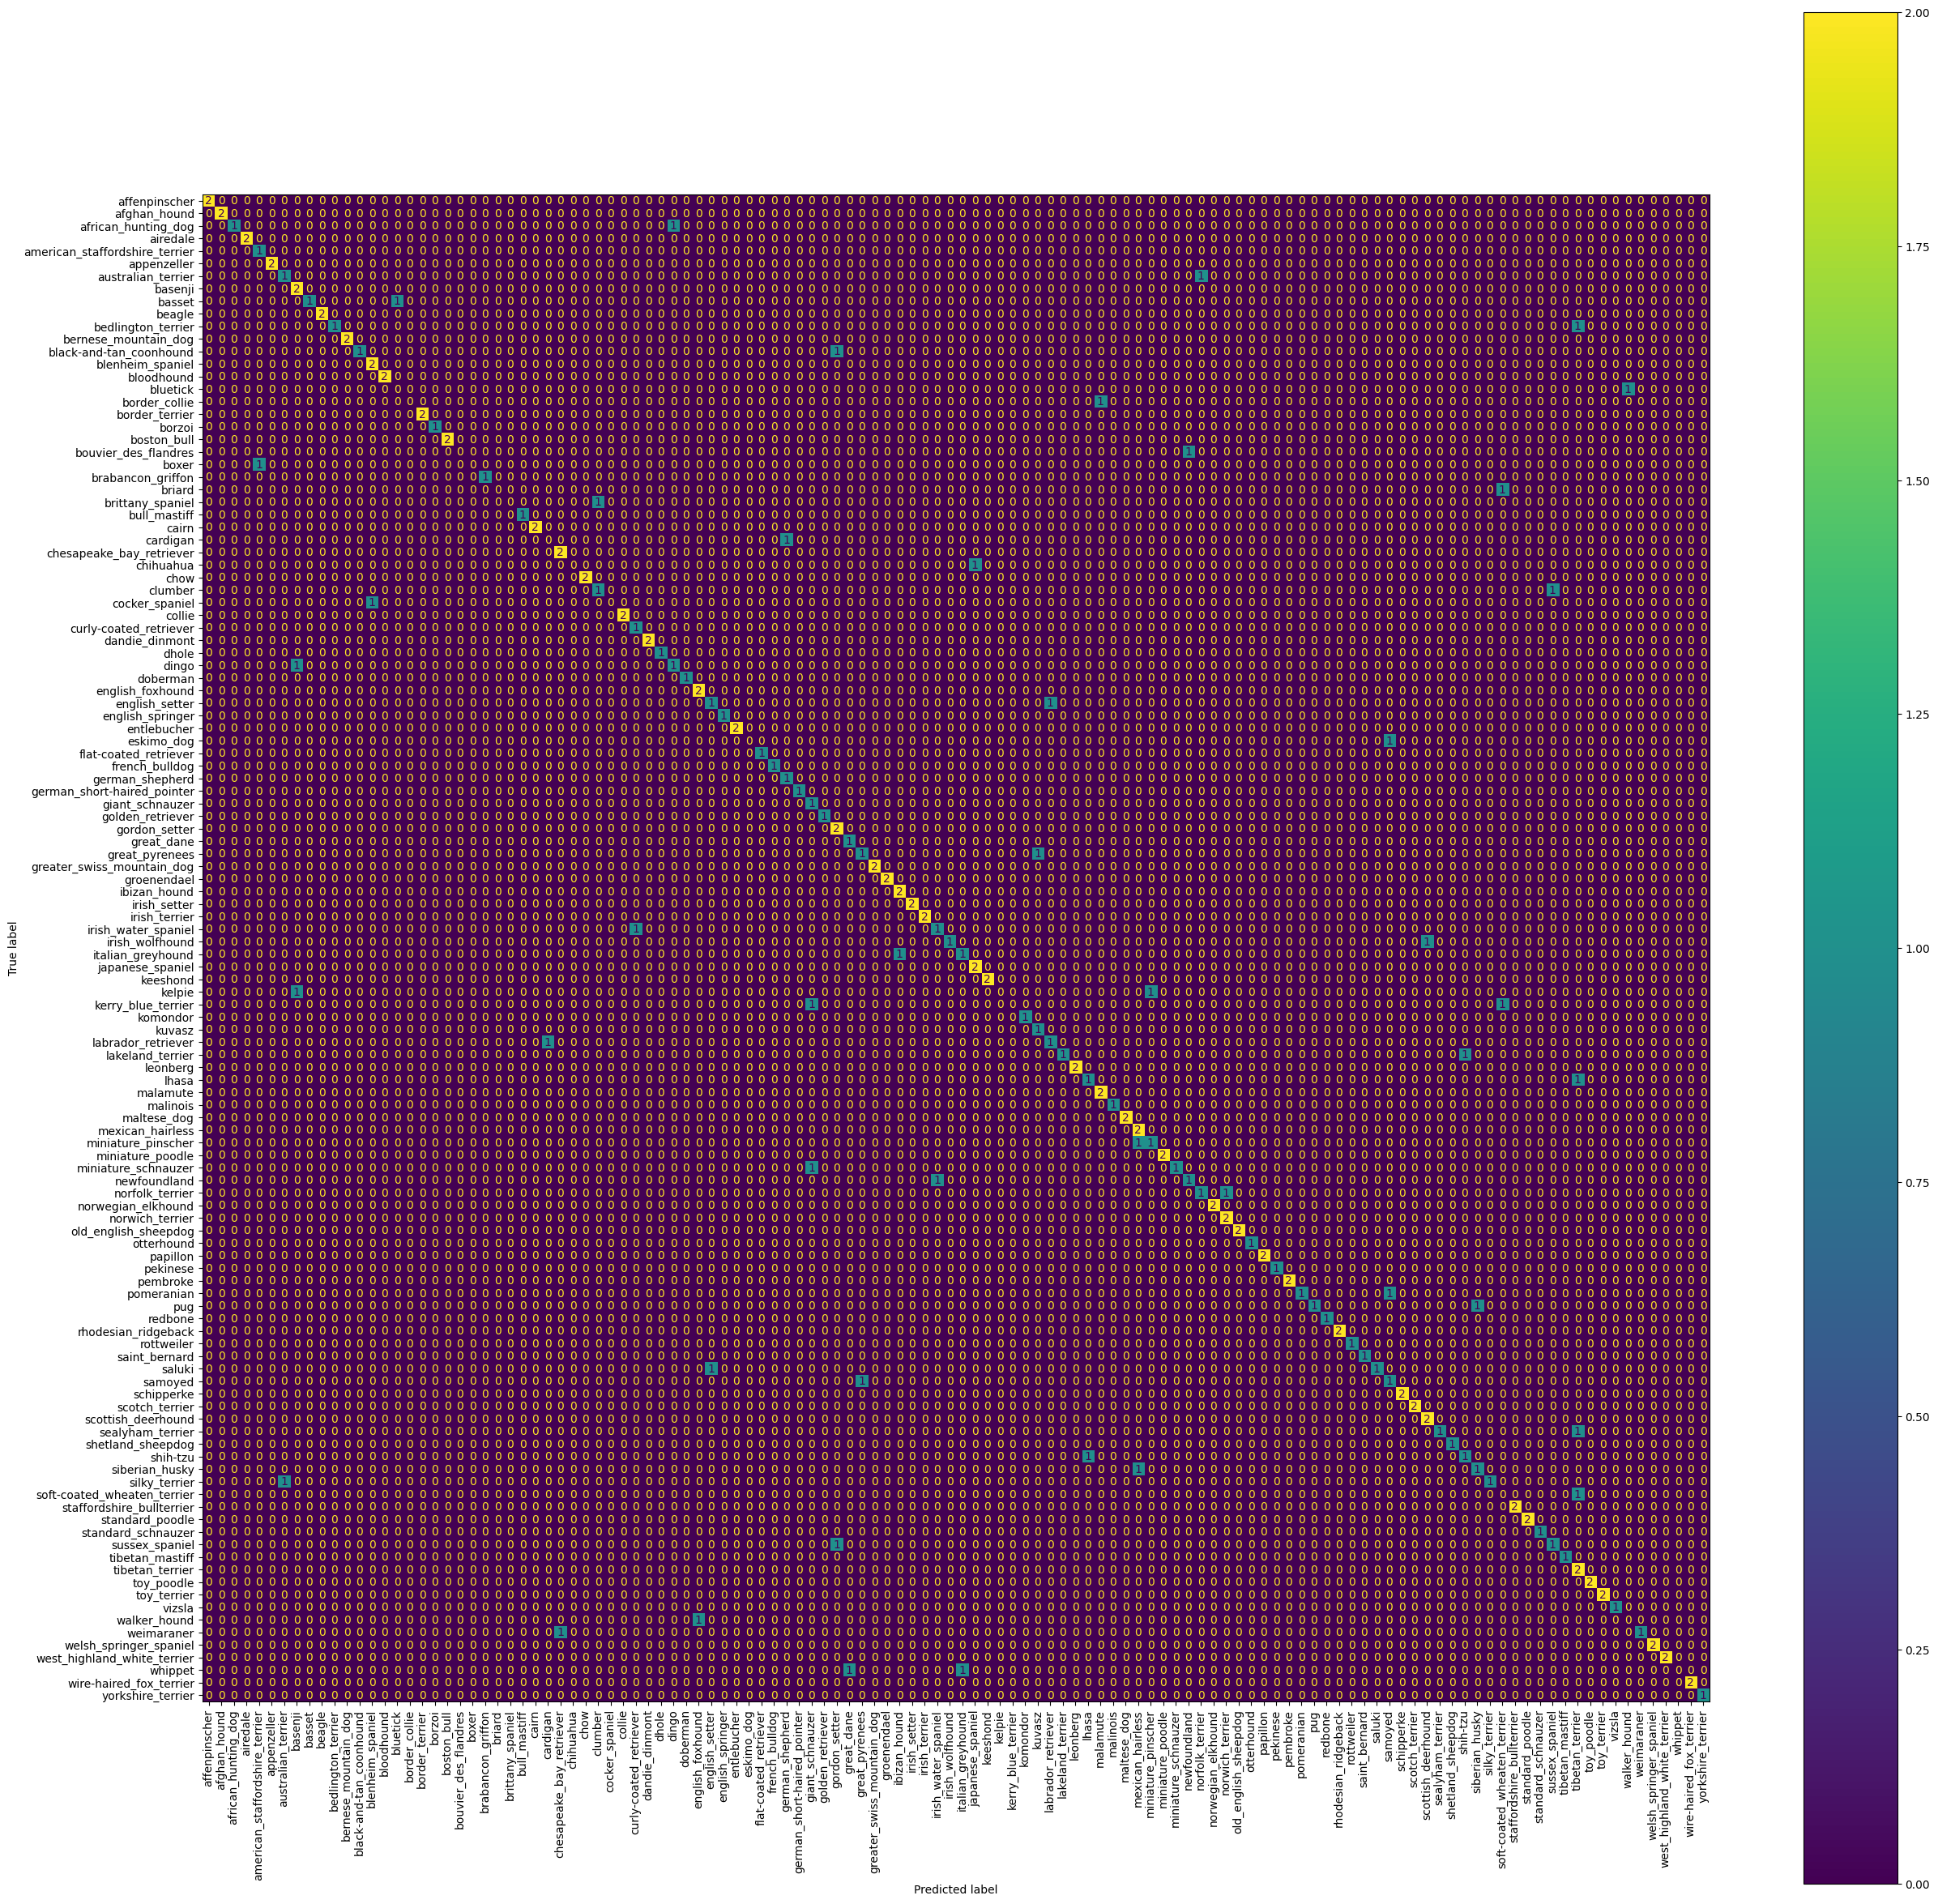

In [ ]:
predicted_labels = [get_predicted_label(predictions[i]) for i in range(len(predictions))]
actual_labels = [get_predicted_label(labels_from_batch[i]) for i in range(len(labels_from_batch))]

cm = confusion_matrix(actual_labels, predicted_labels, labels=unique_labels)

ConfusionMatrixDisplay(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(30,30))
disp.plot(ax=ax,
          xticks_rotation=90);

## Saving and Loading trained model

Let's create a function to save a model

In [26]:
def save_model(model,
               path:str=r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models",
               suffix="-"):
  """
  This function take a model and save it to the model directory and add a suffix

  requrements:
  import os
  import datetime as dt

  parameters:
  model - model we would like to save
  path - path to the directory where the model will be saved
         Default= "/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models"
  suffix - additional infer for madel name, str, Default="-"

  return: path for the saved model
  """
  # path = "./models" # this should work if using on the local computer
  model_dir = os.path.join(path,
                           dt.datetime.now().strftime("%Y%m%d-%H%M%S"))

  model_path = model_dir + "-" + suffix + ".keras"
  print(f"Saving model {model_path}...")
  model.save(model_path)

  return model_path

In [ ]:
# Saving the model
model_path = save_model(model, suffix="1000-images-Adam")

Saving model /content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231106-192623-1000-images-Adam.keras...


Now we need a function for loading model

In [27]:
def load_model(path:str):
  """
  This function load specified model

  required:
  import tensorflow as tf
  import tensorflow_hub as hub

  parameters:
  path - path to the model with model's name, str

  return: model
  """
  print(f"Load the model from {path}...")
  model = tf.keras.models.load_model(path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})

  return model

In [ ]:
# Load the model
model_path = r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231106-192614-1000-images-Adam.keras"
model = load_model(model_path)

Load the model from /content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231106-192614-1000-images-Adam.keras...


In [ ]:
model.evaluate(valid_data)

7/7 [==============================] - 24s 3s/step - loss: 0.9248 - accuracy: 0.7650


[0.9247972965240479, 0.7649999856948853]

## Training model on the full data

* Define initial data
* Set data into the batches
* Create a model
* Create TensorFlow callbacks
* Define early stopping parameter
* Train a model
* Save the trained model

In [28]:
# Define initial data (full dataset for training a model)
# Check length of the full data set
len(X), len(y)

(10222, 10222)

In [29]:
# Set data into the batches
full_data = create_data_batches(X, y)

# Create a model
full_model = create_model()

# Create TensorFlow callbacks
full_model_tesnsorboard = custom_tensorboard_callback()

# Create Early Stopping Callback in order to prevent model overfitting by
# stopping training when a monitored quantaty stopped improving
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

Creating train data batches...
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


**NOTE:** the execution of the next cell will take time to complete (around 30 minutes for the first Epoch) as the GPU has to load all the images the model will be training on into the memory

In [30]:
# Train the model on the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tesnsorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1088s 3s/step - loss: 1.3268 - accuracy: 0.6731
Epoch 2/100
320/320 [==============================] - 30s 93ms/step - loss: 0.3998 - accuracy: 0.8848
Epoch 3/100
320/320 [==============================] - 30s 93ms/step - loss: 0.2354 - accuracy: 0.9355
Epoch 4/100
320/320 [==============================] - 30s 94ms/step - loss: 0.1512 - accuracy: 0.9640
Epoch 5/100
320/320 [==============================] - 29s 92ms/step - loss: 0.1090 - accuracy: 0.9755
Epoch 6/100
320/320 [==============================] - 29s 92ms/step - loss: 0.0766 - accuracy: 0.9877
Epoch 7/100
320/320 [==============================] - 30s 93ms/step - loss: 0.0579 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 30s 93ms/step - loss: 0.0464 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 30s 93ms/step - loss: 0.0369 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 30s 93ms/step - l

In [31]:
# Save the trained model
# First attemt
path_to_full_model = save_model(model=full_model,
                                suffix="full-data-mobilenet_v2_140_224-Adam")

# Second attemt
# path_to_full_model = save_model(model=full_model,
#                                 suffix="full-data-mobilenet_v2_130_224_224-Adam")

path_to_full_model

Saving model /content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231109-082058-full-data-mobilenet_v2_130_224_224-Adam.keras...


'/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231109-082058-full-data-mobilenet_v2_130_224_224-Adam.keras'

In [32]:
# Load full data model
# First attemt full scale model
model_path = r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231107-134215-full-data-mobilenet_v2_140_224-Adam.keras"

# Second attemt full scale model
# model_path = r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231109-082058-full-data-mobilenet_v2_130_224_224-Adam.keras"


full_data_model = load_model(model_path)

Load the model from /content/drive/MyDrive/Colab Notebooks/Dogs_breed/models/20231109-082058-full-data-mobilenet_v2_130_224_224-Adam.keras...


## Make prediction with full_data_model

* Define test files ID
* Create list of pathes to test images
* Tranform data into Tensors and back it into the batches
* Make predictions on the test data

Let's beging with the data preprocessing

In [33]:
# Define the path for test dataset
path_test = r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/"

# Define path for test images
test_images_path = [path_test + file_name for file_name in os.listdir(path_test)]

# Pack the test images into the batches:
test_data = create_data_batches(X=test_images_path,
                                test_data=True)

Creating test data batches...


Verification that everything is OK

In [34]:
len(test_images_path)

10357

In [35]:
test_images_path[:10]

['/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e61cd2626c01dd00117eca55fb099f5d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/dfc41d3f135d49a41e7b796883ff030e.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e30a97eb637239e3b15c903529e04800.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e4f8465214c9644b10c536ecb087b7be.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e2a9a7580a1424bc6531b2b7375338db.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e5e51d0dfc3ccdb74de51933b2671742.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e64b53f9c0fefdd97e269c55335418e7.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e69416b277bf04ba83a5f3586fe12f9b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/e3baf6b2914677edd2729db0f32e2620.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/test/df621265607ba0285bd79705eb3541e0.jpg']

In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Finally we are ready to make prediction
**Note:** As we have **10357** images the execution of the next cell will take a long time to complete

In [36]:
# Make predictions on the test data
predictions_test = full_data_model.predict(test_data, verbose=1)

324/324 [==============================] - 155s 469ms/step


In [37]:
# Verification
predictions_test[0]

array([4.13298210e-07, 5.09629995e-02, 7.00865215e-08, 7.07969411e-06,
       2.44269813e-07, 3.28600471e-08, 1.66350452e-04, 7.38848939e-07,
       6.36337383e-09, 3.09063791e-04, 1.01714881e-09, 4.66595657e-06,
       5.54267501e-07, 1.72679755e-03, 9.28651134e-05, 4.74398548e-05,
       1.53530797e-04, 5.80521771e-07, 3.35059315e-02, 4.29272450e-06,
       4.49829076e-06, 4.97366903e-09, 2.05772309e-07, 2.01810508e-06,
       6.10821227e-10, 9.54712916e-04, 1.48060792e-07, 4.27107625e-05,
       1.29518824e-07, 1.67638689e-04, 1.57212150e-06, 1.94699096e-05,
       7.34692847e-04, 1.94918521e-05, 1.55101356e-04, 2.13686615e-08,
       9.96385863e-10, 3.15498005e-06, 6.88053726e-04, 5.59494412e-03,
       7.09267260e-05, 3.67260941e-06, 5.44501934e-04, 6.02462460e-05,
       1.30703393e-06, 2.06913064e-05, 4.22690101e-02, 5.32736770e-08,
       8.60330110e-05, 5.93481178e-04, 1.74247325e-04, 2.75622675e-04,
       7.14097987e-04, 9.50317190e-05, 2.27935434e-05, 3.17447229e-05,
      

In [38]:
# Save predictions
# First attemt
np.savetxt(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_test.csv",
           predictions_test,
           delimiter=",")

# Second attemt
# np.savetxt(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_test_2.csv",
#            predictions_test,
#            delimiter=",")

In [39]:
# Load predictions
# First attemt
predictions_test = np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_test.csv",
                              delimiter=",")
# Second attemt
# predictions_test = np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_test_2.csv",
#                               delimiter=",")

# Verification
predictions_test[0]

array([4.13298210e-07, 5.09629995e-02, 7.00865215e-08, 7.07969411e-06,
       2.44269813e-07, 3.28600471e-08, 1.66350452e-04, 7.38848939e-07,
       6.36337383e-09, 3.09063791e-04, 1.01714881e-09, 4.66595657e-06,
       5.54267501e-07, 1.72679755e-03, 9.28651134e-05, 4.74398548e-05,
       1.53530797e-04, 5.80521771e-07, 3.35059315e-02, 4.29272450e-06,
       4.49829076e-06, 4.97366903e-09, 2.05772309e-07, 2.01810508e-06,
       6.10821227e-10, 9.54712916e-04, 1.48060792e-07, 4.27107625e-05,
       1.29518824e-07, 1.67638689e-04, 1.57212150e-06, 1.94699096e-05,
       7.34692847e-04, 1.94918521e-05, 1.55101356e-04, 2.13686615e-08,
       9.96385863e-10, 3.15498005e-06, 6.88053726e-04, 5.59494412e-03,
       7.09267260e-05, 3.67260941e-06, 5.44501934e-04, 6.02462460e-05,
       1.30703393e-06, 2.06913064e-05, 4.22690101e-02, 5.32736770e-08,
       8.60330110e-05, 5.93481178e-04, 1.74247325e-04, 2.75622675e-04,
       7.14097987e-04, 9.50317190e-05, 2.27935434e-05, 3.17447229e-05,
      

In [40]:
predictions_test.shape

(10357, 120)

## Make final result file required by kaggle

we need file with table, where collumns are ID, following by breeds' labels and the values is image ID and probabilities for each breed

In [41]:
# Define images ID, we will need that for final result
test_files_names = [file_name[:-4] for file_name in os.listdir(path_test)] # This is ID for test images
test_files_names[:10]

['e61cd2626c01dd00117eca55fb099f5d',
 'dfc41d3f135d49a41e7b796883ff030e',
 'e30a97eb637239e3b15c903529e04800',
 'e4f8465214c9644b10c536ecb087b7be',
 'e2a9a7580a1424bc6531b2b7375338db',
 'e5e51d0dfc3ccdb74de51933b2671742',
 'e64b53f9c0fefdd97e269c55335418e7',
 'e69416b277bf04ba83a5f3586fe12f9b',
 'e3baf6b2914677edd2729db0f32e2620',
 'df621265607ba0285bd79705eb3541e0']

In [42]:
# Breeds label:
print(len(unique_labels))
unique_labels[:10]

120


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle'], dtype=object)

In [43]:
# probabilities:
predictions_test[0]

array([4.13298210e-07, 5.09629995e-02, 7.00865215e-08, 7.07969411e-06,
       2.44269813e-07, 3.28600471e-08, 1.66350452e-04, 7.38848939e-07,
       6.36337383e-09, 3.09063791e-04, 1.01714881e-09, 4.66595657e-06,
       5.54267501e-07, 1.72679755e-03, 9.28651134e-05, 4.74398548e-05,
       1.53530797e-04, 5.80521771e-07, 3.35059315e-02, 4.29272450e-06,
       4.49829076e-06, 4.97366903e-09, 2.05772309e-07, 2.01810508e-06,
       6.10821227e-10, 9.54712916e-04, 1.48060792e-07, 4.27107625e-05,
       1.29518824e-07, 1.67638689e-04, 1.57212150e-06, 1.94699096e-05,
       7.34692847e-04, 1.94918521e-05, 1.55101356e-04, 2.13686615e-08,
       9.96385863e-10, 3.15498005e-06, 6.88053726e-04, 5.59494412e-03,
       7.09267260e-05, 3.67260941e-06, 5.44501934e-04, 6.02462460e-05,
       1.30703393e-06, 2.06913064e-05, 4.22690101e-02, 5.32736770e-08,
       8.60330110e-05, 5.93481178e-04, 1.74247325e-04, 2.75622675e-04,
       7.14097987e-04, 9.50317190e-05, 2.27935434e-05, 3.17447229e-05,
      

Create final result

In [44]:
id_images = pd.DataFrame(test_files_names, columns=["id"])
labels_probabilities = pd.DataFrame(predictions_test, columns=unique_labels)
final_result = id_images.join(labels_probabilities)
final_result.head()

id  affenpinscher  afghan_hound  \
0  e61cd2626c01dd00117eca55fb099f5d   4.132982e-07  5.096300e-02   
1  dfc41d3f135d49a41e7b796883ff030e   1.527257e-08  2.002588e-05   
2  e30a97eb637239e3b15c903529e04800   1.447517e-03  1.743093e-07   
3  e4f8465214c9644b10c536ecb087b7be   4.738419e-08  2.587901e-08   
4  e2a9a7580a1424bc6531b2b7375338db   8.296314e-07  6.666625e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         7.008652e-08  7.079694e-06                    2.442698e-07   
1         4.855759e-09  3.070821e-07                    3.651041e-10   
2         3.633756e-08  4.229578e-10                    1.068830e-10   
3         5.357201e-08  2.282901e-07                    3.174222e-09   
4         4.457896e-06  1.217014e-06                    8.769463e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.286005e-08        1.663505e-04  7.388489e-07  6.363374e-09  ...   
1  1.186772e-10        8.283013e-11  8.560145e-09  3.115532e-09  ...   
2  1.171736e-08        1.176174e-04  4.215582e-09  2.344138e-08  ...   
3  1.181277e-06        3.755404e-12  1.136070e-10  2.665501e-12  ...   
4  1.866704e-08        2.257560e-06  3.563927e-08  1.097741e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  5.766774e-03  1.267872e-07  4.524666e-09  4.798685e-04  2.718580e-06   
1  5.715105e-06  6.884625e-08  3.306611e-10  1.365908e-06  2.659332e-08   
2  4.354747e-08  1.332711e-07  2.201882e-09  8.424090e-10  2.410314e-07   
3  4.374866e-11  3.279184e-09  4.090677e-11  1.421121e-08  5.302421e-07   
4  4.929904e-09  4.673787e-08  1.068697e-09  2.333907e-07  8.006850e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.451750e-01                 4.943073e-06  2.678290e-03   
1            8.547663e-09                 7.657340e-06  3.012865e-05   
2            9.509641e-07                 9.811089e-07  5.153693e-07   
3            3.923505e-11                 1.087268e-10  8.167166e-08   
4            6.947124e-09                 1.978348e-07  1.104539e-06   

   wire-haired_fox_terrier  yorkshire_terrier  
0             4.818888e-06       5.063339e-05  
1             1.504558e-07       3.190493e-08  
2             4.906651e-09       7.470706e-03  
3             4.353909e-07       2.842444e-11  
4             5.405549e-06       3.638908e-06  

[5 rows x 121 columns]

Saving final result to the csv file

In [45]:
# Saving final result
# First attemt
final_result.to_csv(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_result_test.csv",
                    index=False)

# Second attemt
# final_result.to_csv(r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_result_test_2.csv",
#                     index=False)

In [47]:
# Verification (load the saved data):
# First attemt
final_result_check = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_result_test.csv")

# Second attemt
# final_result_check = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dogs_breed/predictions_result_test_2.csv")

final_result_check.head()

id  affenpinscher  afghan_hound  \
0  e61cd2626c01dd00117eca55fb099f5d   4.132982e-07  5.096300e-02   
1  dfc41d3f135d49a41e7b796883ff030e   1.527257e-08  2.002588e-05   
2  e30a97eb637239e3b15c903529e04800   1.447517e-03  1.743093e-07   
3  e4f8465214c9644b10c536ecb087b7be   4.738419e-08  2.587901e-08   
4  e2a9a7580a1424bc6531b2b7375338db   8.296314e-07  6.666625e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         7.008652e-08  7.079694e-06                    2.442698e-07   
1         4.855759e-09  3.070821e-07                    3.651041e-10   
2         3.633756e-08  4.229578e-10                    1.068830e-10   
3         5.357201e-08  2.282901e-07                    3.174222e-09   
4         4.457896e-06  1.217014e-06                    8.769463e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.286005e-08        1.663505e-04  7.388489e-07  6.363374e-09  ...   
1  1.186772e-10        8.283013e-11  8.560145e-09  3.115532e-09  ...   
2  1.171736e-08        1.176174e-04  4.215582e-09  2.344138e-08  ...   
3  1.181277e-06        3.755404e-12  1.136070e-10  2.665501e-12  ...   
4  1.866704e-08        2.257560e-06  3.563927e-08  1.097741e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  5.766774e-03  1.267872e-07  4.524666e-09  4.798685e-04  2.718580e-06   
1  5.715105e-06  6.884625e-08  3.306611e-10  1.365908e-06  2.659332e-08   
2  4.354747e-08  1.332711e-07  2.201882e-09  8.424090e-10  2.410314e-07   
3  4.374866e-11  3.279184e-09  4.090677e-11  1.421121e-08  5.302421e-07   
4  4.929904e-09  4.673787e-08  1.068697e-09  2.333907e-07  8.006850e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.451750e-01                 4.943073e-06  2.678290e-03   
1            8.547663e-09                 7.657340e-06  3.012865e-05   
2            9.509641e-07                 9.811089e-07  5.153693e-07   
3            3.923505e-11                 1.087268e-10  8.167166e-08   
4            6.947124e-09                 1.978348e-07  1.104539e-06   

   wire-haired_fox_terrier  yorkshire_terrier  
0             4.818888e-06       5.063339e-05  
1             1.504558e-07       3.190493e-08  
2             4.906651e-09       7.470706e-03  
3             4.353909e-07       2.842444e-11  
4             5.405549e-06       3.638908e-06  

[5 rows x 121 columns]

* First attempt score (mobilenet_v2_140_224): **0.75233**
* Second attempt score (mobilenet_v2_130_224): **0.79994**

So the new model (mobilenet_v2_140_224) is more efficient than the originaly used (mobilenet_v2_130_224),   
although its effectivness is less than perfect

## Making predictions on custom images
* Load images
* Convert images into Tensors and pack them into the batches (set parameter test_data=True)
* Make predictions on that images
* Visualize predictions

In [ ]:
# Define the path to the nre images
path_custom_images = r"/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/"

# Create list of pathes to the new images
custom_images = [path_custom_images + fname for fname in os.listdir(path_custom_images)]
custom_images

['/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/3-210.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/cd5a78240a1b41914a24a3d626896d24.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/dalmatin_09.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/f333666d12d01f70883540f7b17ecff9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/krasivye-kartinki-sobak-50.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/a928850ddd1d4c9d5c3e23103ca8fcd8.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/кроличья такса.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogs_breed/custom_images/1696601772_gas-kvas-com-p-kartinki-s-sobakami-22.jpg']

In [ ]:
# turn data into batches dataset
custom_images_batches = create_data_batches(X=custom_images,
                                            test_data=True)
custom_images_batches

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on custom images
custom_images_predictions = full_data_model.predict(custom_images_batches,
                                                    verbose=1)
custom_images_predictions[0]

1/1 [==============================] - 9s 9s/step


array([1.74202666e-10, 2.73456324e-09, 1.22013502e-08, 2.24247215e-05,
       1.26443400e-09, 2.19099992e-03, 4.25989839e-07, 1.60011862e-08,
       1.08412035e-08, 2.57728638e-09, 8.55865712e-10, 2.07230987e-04,
       6.71550870e-11, 2.60674291e-08, 1.86239990e-09, 4.04615763e-09,
       6.36662124e-04, 6.95903157e-09, 6.39539585e-03, 1.28063089e-08,
       3.11889837e-12, 1.55598503e-11, 1.11674547e-06, 1.26511983e-08,
       1.16311912e-06, 3.79771130e-08, 2.86518777e-11, 1.47359169e-05,
       4.39642944e-09, 2.15952891e-08, 1.04859108e-08, 1.54364663e-11,
       2.71106315e-09, 2.07888763e-02, 3.91487329e-11, 3.42036885e-11,
       1.39137910e-07, 4.16832933e-08, 7.66324035e-07, 1.50776955e-08,
       1.93163828e-06, 4.67824807e-11, 4.42617498e-08, 6.45608367e-08,
       1.20759114e-06, 1.77955307e-13, 2.89403829e-06, 3.02656880e-12,
       2.04742134e-09, 2.63988511e-07, 5.53422304e-08, 4.40118093e-08,
       1.17027215e-08, 1.80665776e-08, 6.50995915e-08, 7.32543754e-07,
      

In [ ]:
custom_images_predictions.shape

(8, 120)

In [ ]:
# Get custom prediction labels:
custom_labels = [get_predicted_label(prediction) for prediction in custom_images_predictions]
custom_labels

['shetland_sheepdog',
 'lhasa',
 'great_dane',
 'mexican_hairless',
 'malamute',
 'samoyed',
 'collie',
 'german_shepherd']

In [ ]:
# Transform images into tensors
custom_images_tensors = [image_processing(image) for image in custom_images]

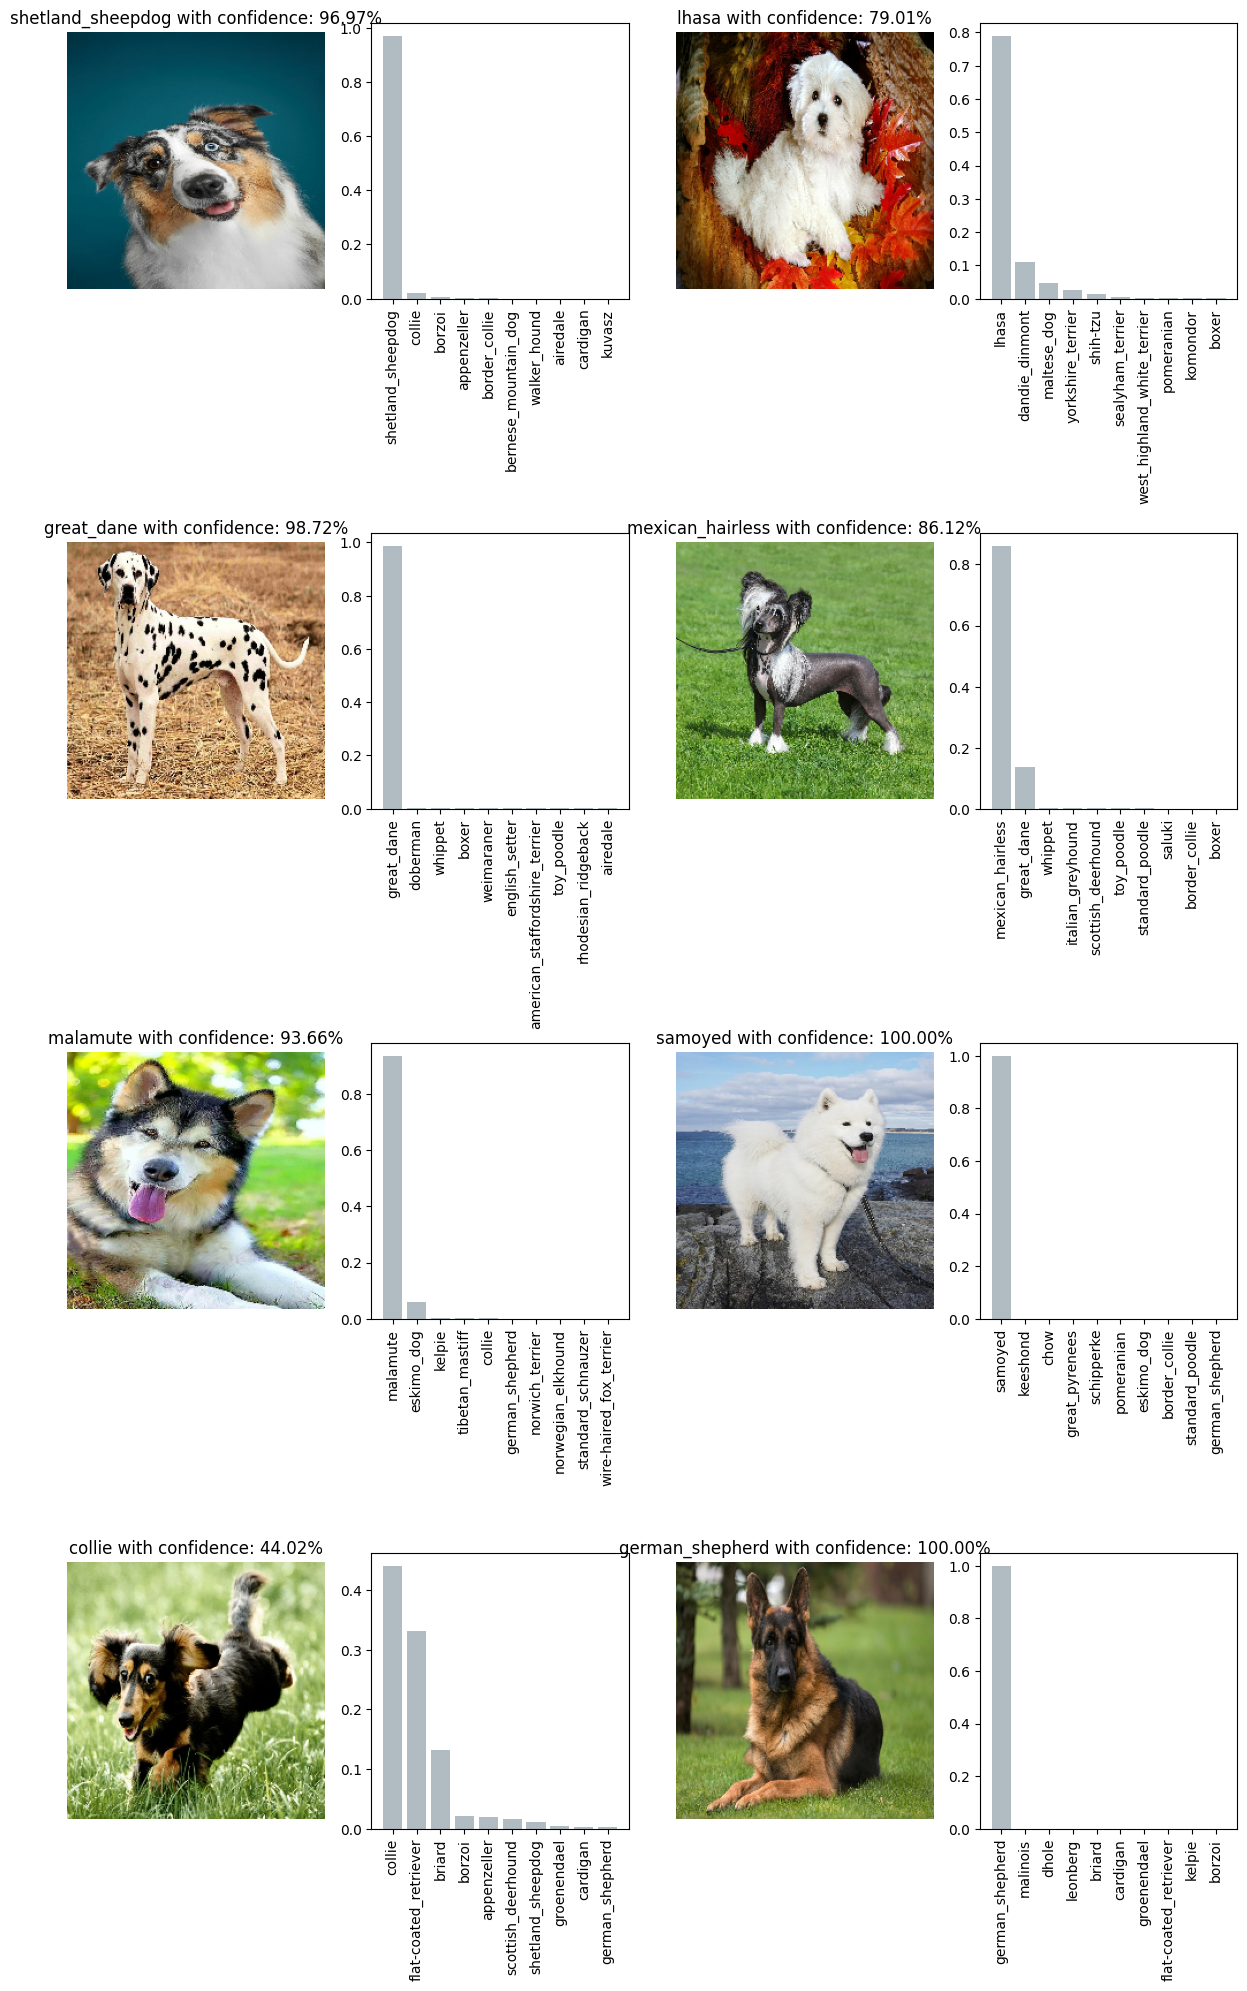

In [ ]:
plot_pred_images(images=custom_images_tensors,
                 predictions=custom_images_predictions,
                 num_images=len(custom_images))